In [1]:
import pandas as pd
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

%matplotlib inline

In [2]:
data = yf.download("CL=F"
                   , start="2018-01-01", end="2022-10-26")

[*********************100%***********************]  1 of 1 completed


In [3]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume'])
data_df.tail()

,Close
Date,
2022-10-19,85.550003
2022-10-20,85.980003
2022-10-21,85.050003
2022-10-24,84.580002
2022-10-25,85.320000


In [4]:
data_df.isna().sum()

Close    0
dtype: int64

In [5]:
daily_change = data_df.pct_change()
daily_change.tail()

,Close
Date,
2022-10-19,0.032963
2022-10-20,0.005026
2022-10-21,-0.010816
2022-10-24,-0.005526
2022-10-25,0.008749


<AxesSubplot:xlabel='Date'>

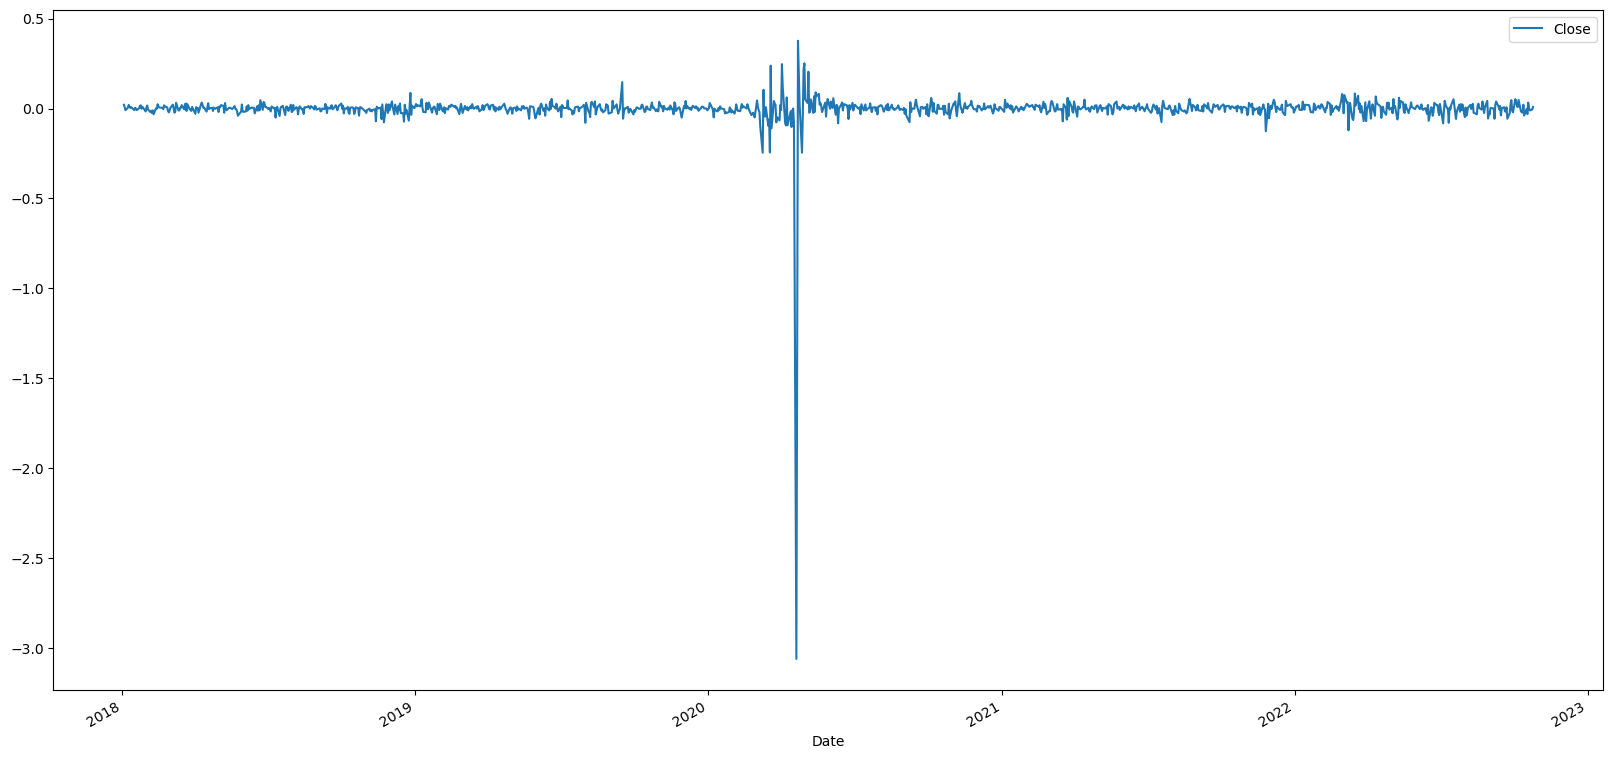

In [6]:
daily_change.plot(figsize=(20,10))

In [7]:
daily_change.describe()

,Close
count,1214.000000
mean,-0.002198
std,0.101127
min,-3.059661
25%,-0.011843
50%,0.002316
75%,0.014584
max,0.376623


In [8]:
average = daily_change.mean()
average = average.sort_values()
average

Close   -0.002198
dtype: float64

In [9]:
std = daily_change.std()
std = std.sort_values()
std

Close    0.101127
dtype: float64

In [10]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_change).cumprod()
cumulative_returns.head()

,Close
Date,
2018-01-02,NaN
2018-01-03,1.020871
2018-01-04,1.027166
2018-01-05,1.017724
2018-01-08,1.022528


<AxesSubplot:xlabel='Date'>

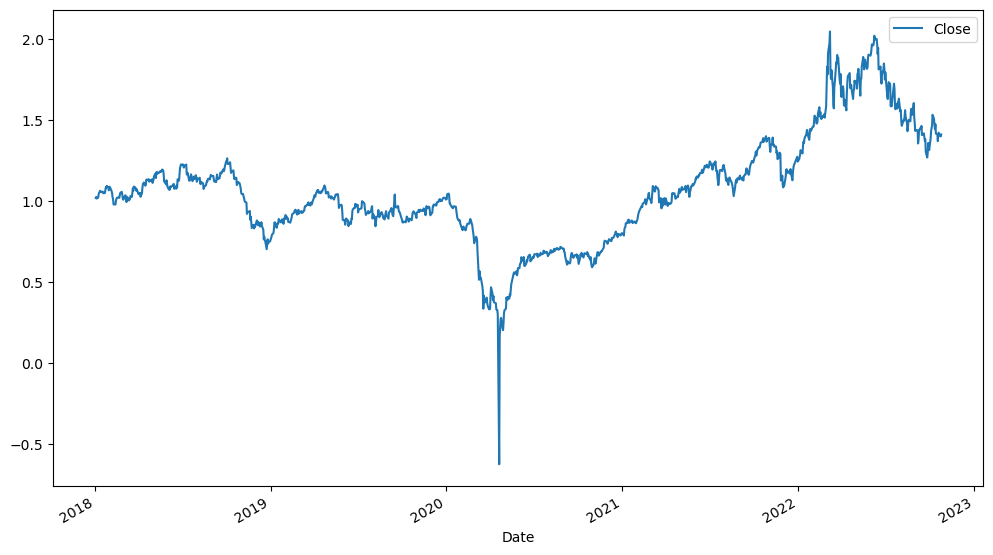

In [11]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))